In [28]:
# imports for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import the data and examine it
data = pd.read_csv('parkrun_allresults_may2025.csv')
display(data.sample(3))
print(data.info())

,event,run_date,run_number,position,run_time,age_grade,pb
117,St Peters,18/08/2018,341,283,29:16:00,44.08%,NaN
21,St Peters,28/09/2024,591,274,29:39:00,43.73%,NaN
57,St Peters,14/10/2023,540,222,28:24:00,45.54%,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event       118 non-null    object
 1   run_date    118 non-null    object
 2   run_number  118 non-null    int64 
 3   position    118 non-null    int64 
 4   run_time    118 non-null    object
 5   age_grade   118 non-null    object
 6   pb          11 non-null     object
dtypes: int64(2), object(5)
memory usage: 6.6+ KB
None


In [29]:
# Note that rundate is not datetime, time is set as object, same with age-grade
data['run_date'] = pd.to_datetime(data['run_date'], dayfirst=True)
data['age_grade'] = data['age_grade'].replace('%', '', regex=True)
data['age_grade'] = data['age_grade'].astype(float)
# pandas cannot deal with ":" in the time column, so we need to split it
data['run_time'] = data['run_time'].astype(str)
parts = data['run_time'].str.split(':', expand=True).fillna(0).astype(int)
# parts[0]=minutes, parts[1]=seconds, parts[2]=milliseconds (always zero)
data['run_delta'] = (
    pd.to_timedelta(parts[0], unit='m')
  + pd.to_timedelta(parts[1], unit='s')
  + pd.to_timedelta(parts[2], unit='ms')
)

# extract minutes and seconds from the timedelta
total_sec = data['run_delta'].dt.seconds
mins = total_sec // 60
secs = total_sec % 60

# recreate
data['run_time'] = (mins.astype(str).str.zfill(2)  + ':'  + secs.astype(str).str.zfill(2))

# Convert your timedelta to numeric minutes
run_minutes = data['run_delta'].dt.total_seconds() / 60

In [75]:
# check how the data is looking now
df.sample(3)
#df.info()

,event,run_number,position,run_time,age_grade,pb,run_delta,run_minutes,month
run_date,,,,,,,,,
2021-06-19,St Peters,443,52,23:31,54.85,PB,0 days 00:23:31,23.516667,June
2021-02-13,St Peters,425,119,26:55,47.93,NaN,0 days 00:26:55,26.916667,February
2024-06-01,St Peters,574,232,28:10,46.04,NaN,0 days 00:28:10,28.166667,June


We've already looked at our overall run times, the mean and what we might be able to run in the past. 
Let's look at something else. What about the impact of seasonality ? 
Does Summer Help ? Or Does Winter ?

In [ ]:
# new data to work with for vis
df = data.copy()

# find a way to get runtiimes as an integer (for visualisation)
df['run_minutes'] = df['run_delta'].dt.total_seconds() / 60

# set run_date to index
df.set_index('run_date', inplace=True)

# extract month for visualisations
df['month'] = df.index.month_name()

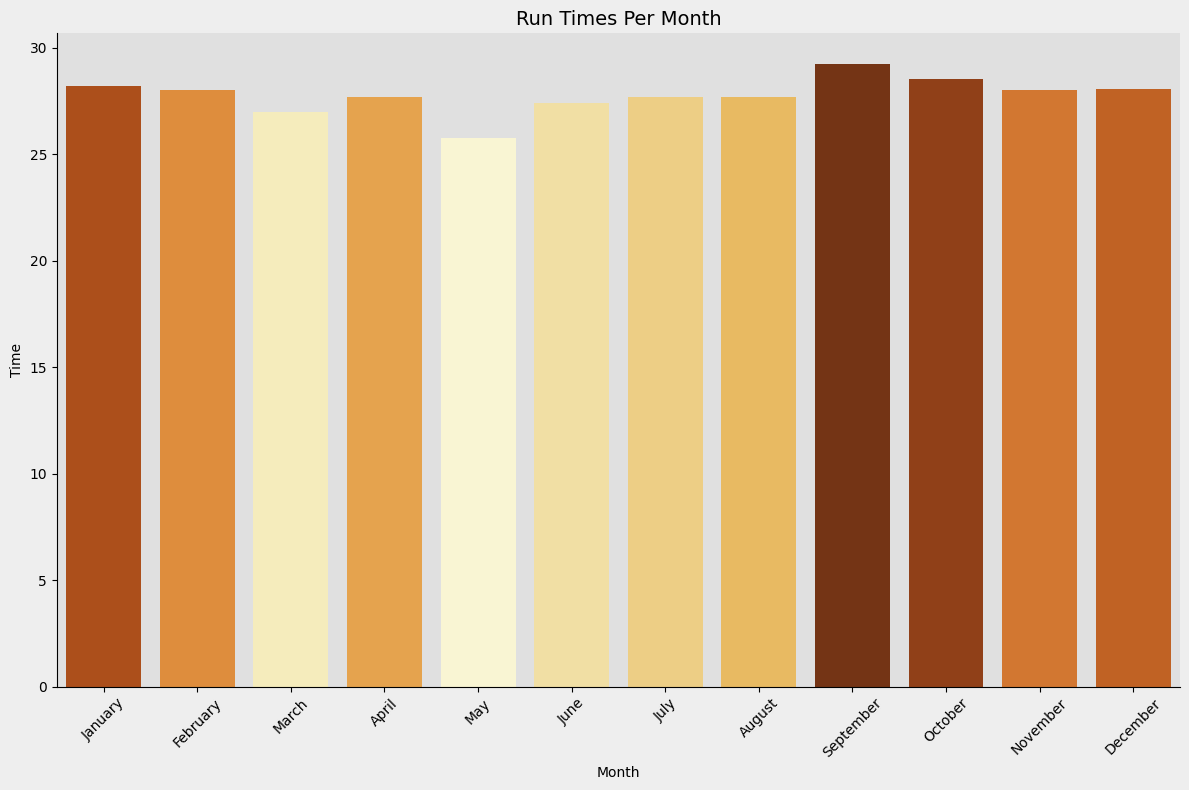

In [51]:
# calculate average run times per month (using old code from a previous day)
monthly_avg = df.groupby('month')['run_minutes'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# custom palette
palette_option = sns.color_palette("YlOrBr", n_colors=12)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, hue=monthly_avg.values, dodge=False, palette=palette_option)
plt.xticks(rotation=45)
plt.title("Run Times Per Month", fontsize=14)
plt.ylabel("Time")
plt.xlabel("Month")
plt.legend().set_visible(False)
sns.despine()

# Background color
plt.gca().set_facecolor('#e0e0e0')  # light grey plot area
plt.gcf().patch.set_facecolor('#eeeeee')  # figure background

# Add grid lines
plt.tight_layout()
plt.show()


Not quite the massive effect we were hoping for but, but the effect does show a pattern that is interesting. 
The Graph doesn't show the size of the impact. Mayve we can zoom in a little. 


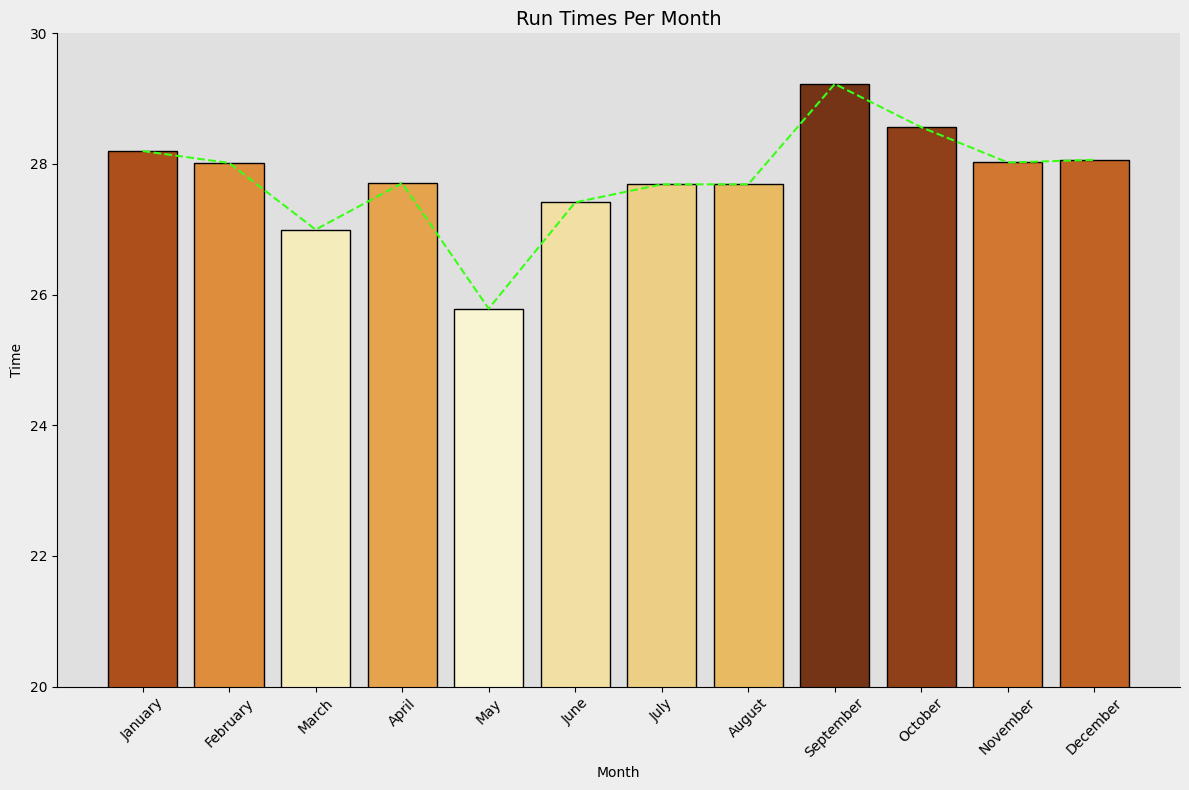

In [66]:
#Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, hue=monthly_avg.values, dodge=False, palette=palette_option, edgecolor="black")
plt.xticks(rotation=45)
plt.title("Run Times Per Month", fontsize=14)
plt.ylabel("Time")
plt.xlabel("Month")
plt.ylim(20,30)
sns.despine()

# add a trendline
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, linestyle="--", color="#39ff14")
plt.legend().set_visible(False)

# Background color
plt.gca().set_facecolor('#e0e0e0')  # light grey plot area
plt.gcf().patch.set_facecolor('#eeeeee')  # figure background

# Add grid lines
plt.tight_layout()
plt.show()

C:\Users\tj92a\AppData\Local\Temp\ipykernel_7672\3863917781.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


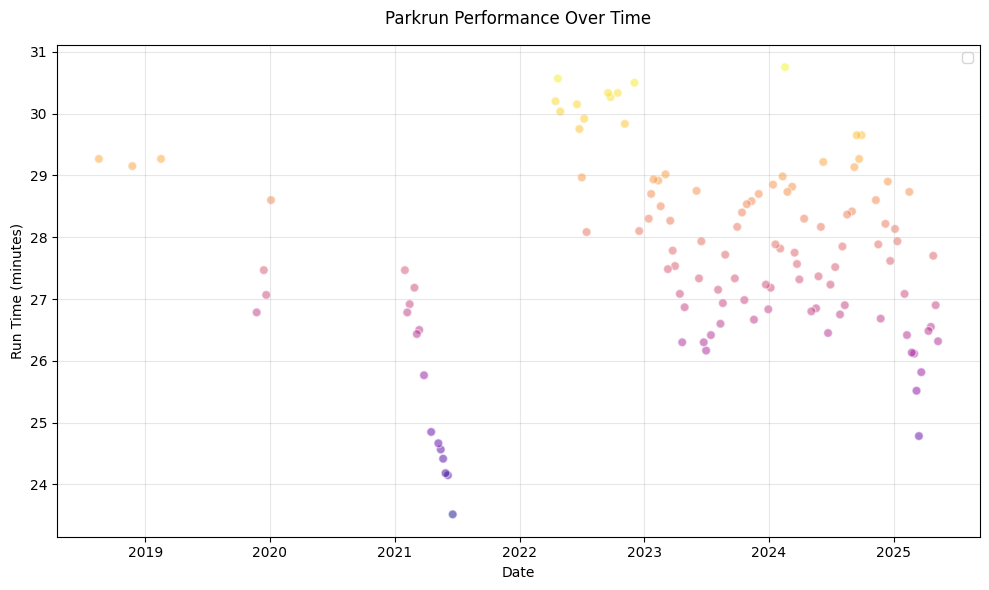

In [74]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df.index, df['run_minutes'],
    alpha=0.5, s=40, marker='o', edgecolor='w',
    c=df['run_minutes'], cmap='plasma'
)

# Beautify
plt.title("Parkrun Performance Over Time", pad=15)
plt.xlabel("Date")
plt.ylabel("Run Time (minutes)")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


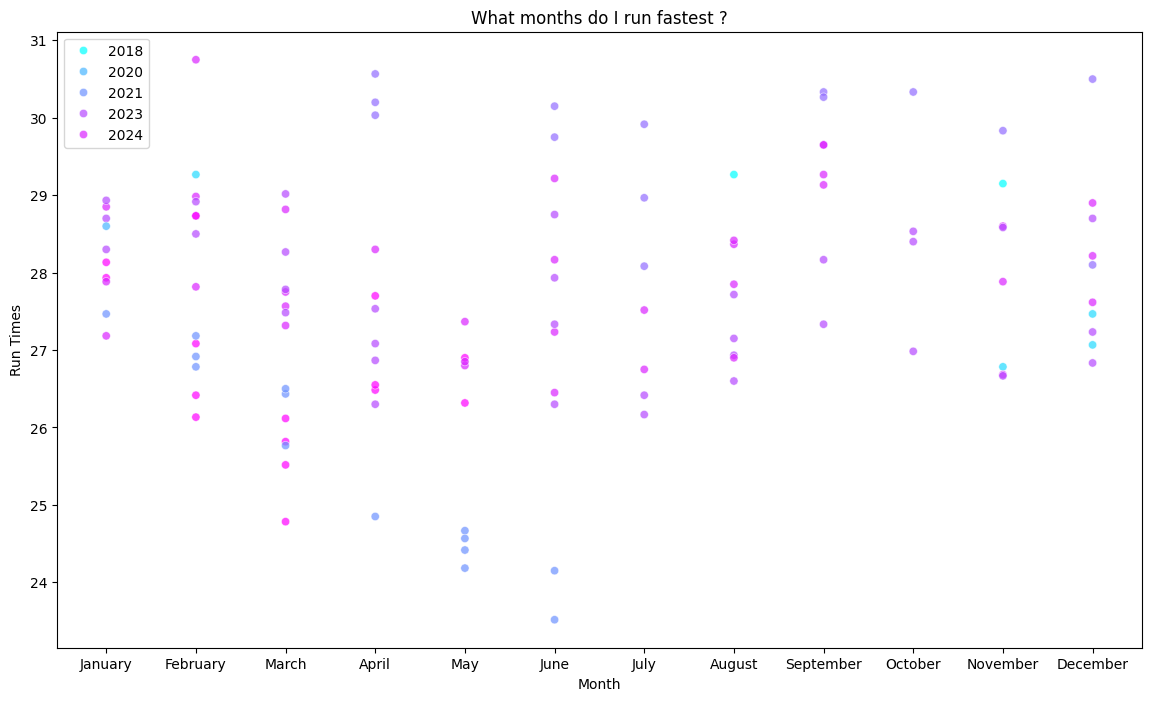

In [82]:
# generate the month number - remember date is in index as run_date
df['month_num'] = df.index.month

# sort for 1-12
df['year'] = df.index.year

# 
df = df.sort_values('month_num')

# build the plot
plt.figure(figsize=(14,8))
sns.scatterplot(data=df, x='month', y='run_minutes', hue='year', palette='cool', alpha=0.7)
plt.title("What months do I run fastest ?")
plt.ylabel("Run Times")
plt.xlabel("Month")
plt.legend()


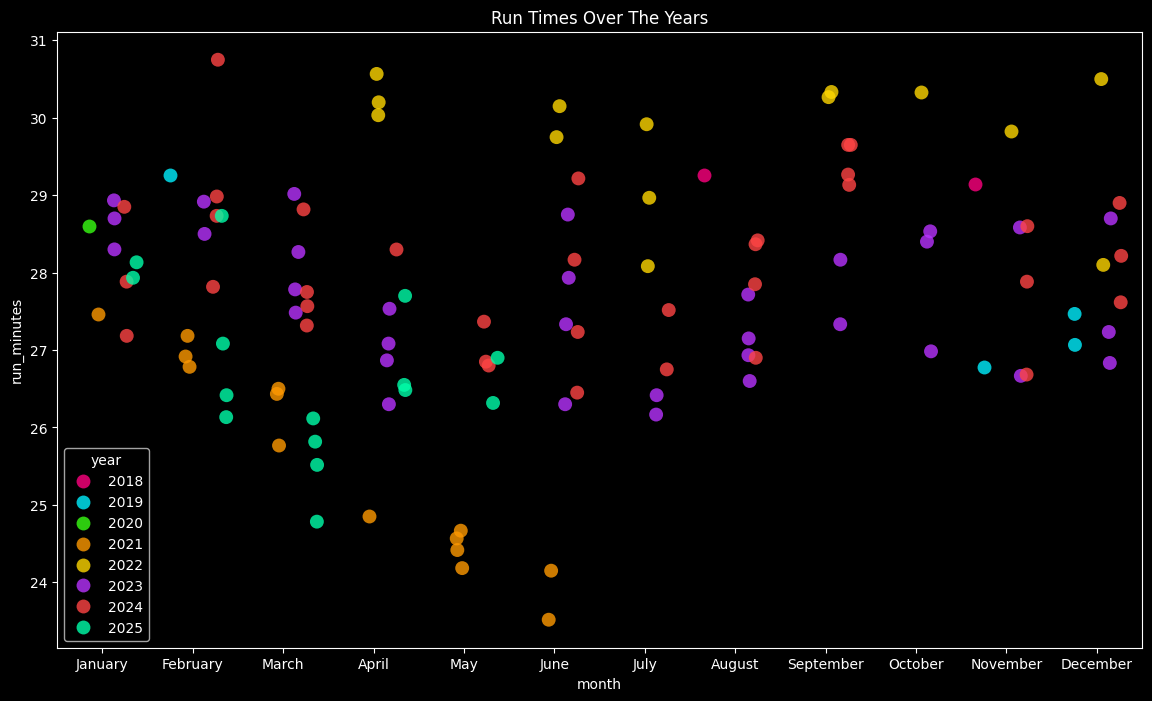

In [91]:
# decent, but missing something. Let's try an alternative. 
# lets darkmode
plt.style.use('dark_background')
custom_palette = ["#FF007F", "#00F0FF", "#39FF14", "#FF9900", "#FFD700", "#B833FF", "#FF4444", "#00FFAA"]

plt.figure(figsize=(14,8))
sns.stripplot(
    x='month',
    y='run_minutes',
    data=df,
    hue='year',
    palette=custom_palette,
    dodge=True,
    jitter=0.25,
    alpha=0.8,
    size=10,
    marker='o'
)

plt.title("Run Times Over The Years")

plt.show()